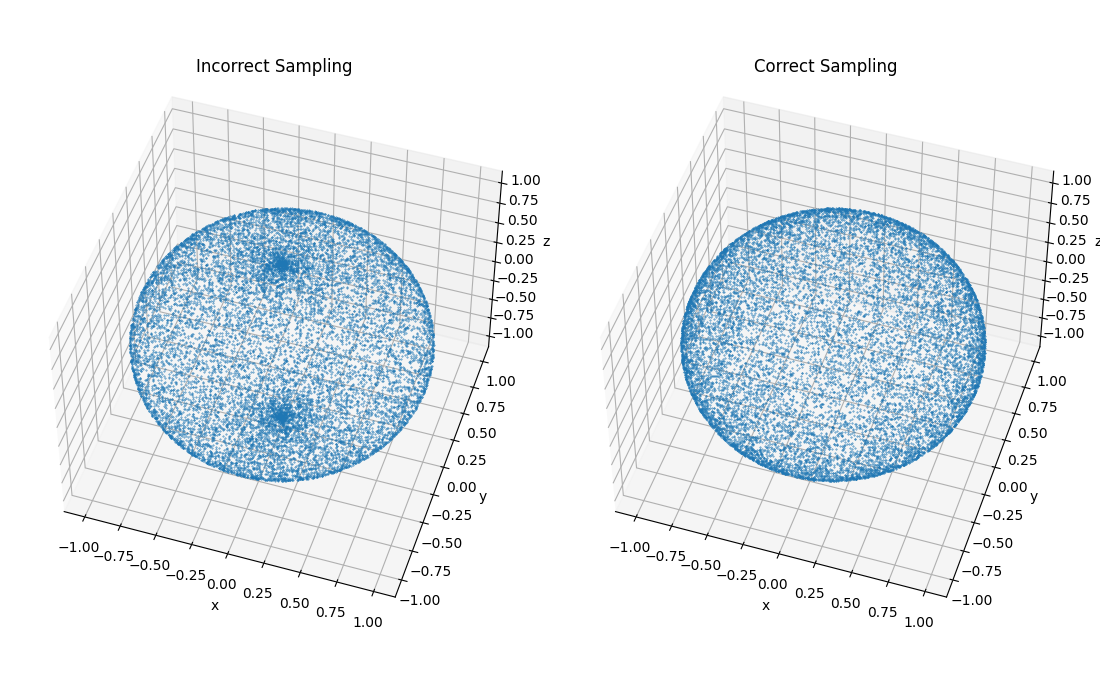

In [2]:
"""surface_sampling_sphere.ipynb"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random
from matplotlib.markers import MarkerStyle

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget


def plot_incorrect(ax: Axes) -> None:
    """
    Plots the incorrect sampling of points on a sphere

    Args:
        ax: Matplotlib axes object on which to plot
    """
    num_samples = 15000

    # Genereating poloidal and toroidal angle values
    u: NDArray[np.float_] = random.rand(num_samples) * np.pi  # poloidal angle
    v: NDArray[np.float_] = random.rand(num_samples) * 2 * np.pi  # toroidal angle

    # Calculating x, y, and z coordinates using incorrect formulas
    x: NDArray[np.float_] = np.array(np.sin(u) * np.sin(v), dtype=np.float_)
    y: NDArray[np.float_] = np.array(np.sin(u) * np.cos(v), dtype=np.float_)
    z: NDArray[np.float_] = np.cos(u)

    # Setting plot title, x-axis label, y-axis label, z-axis label, and view angles
    ax.set_title("Incorrect Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")  # type: ignore
    ax.view_init(azim=-72, elev=48)  # type: ignore

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore

    # Plotting the sampled points on the sphere
    ax.scatter(x, y, z, marker=MarkerStyle("."), s=pixel_size, depthshade=False)  # type: ignore


def plot_correct(ax: Axes) -> None:
    """
    Plots the correct sampling of points on a sphere

    Args:
        ax: Matplotlib axes object on which to plot
    """
    num_samples = 15000

    # Generating polodial and torodial angle values
    # fmt: off
    # Used Dave's code
    # TODO: Fix this next line
    u: NDArray[np.float_] = np.arccos(2 * random.rand(num_samples) - 1) # poloidal angle
    v: NDArray[np.float_] = random.rand(num_samples) * 2 * np.pi  # toroidal angle
    # fmt: on

    # Calculating x, y, and z coordinates using correct formulas
    x: NDArray[np.float_] = np.array(np.sin(u) * np.sin(v), dtype=np.float_)
    y: NDArray[np.float_] = np.array(np.sin(u) * np.cos(v), dtype=np.float_)
    z = np.cos(u)

    # Setting plot title, x-axis label, y-axis label, z-axis label, and view angles
    ax.set_title("Correct Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")  # type: ignore
    ax.view_init(azim=-72, elev=48)  # type: ignore

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore

    # Plotting the sampled points on the sphere
    ax.scatter(x, y, z, marker=MarkerStyle("."), s=pixel_size, depthshade=False)  # type: ignore


def main() -> None:
    """Main function that generates and displays the plots of incorrect and correct sampling on a sphere"""
    plt.close("all")
    plt.figure(" ", figsize=((11, 7)), constrained_layout=True)

    # Plotting the incorrect and correct sampling on subplots with 3D projection
    plot_incorrect(plt.subplot(121, projection="3d"))
    plot_correct(plt.subplot(122, projection="3d"))
    
    plt.show()


main()